# Importing Test Data

In [9]:
import keras
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import png

In [10]:
def import_test_images():
    test_images=[]
    files=os.listdir('/home/pedro/Documents/AutoEncoder/test')
    print(files)
    for file in files:
        string='/home/pedro/Documents/AutoEncoder/test/'+file
        image=png.Reader(filename=string)
        w,h,pixels,metadata=image.read_flat()
        image=np.array(pixels)
        if len(image)==226800:
            image=image.reshape((420,540))              
        else:
            image=image.reshape((258,540))
        test_images.append(image)
    return(test_images)

In [11]:
def Data_split(img,lab):
    small_images=[]
    small_labels=[]
    big_images=[]
    big_labels=[]
    for i in range(len(img)):
        if len(img[i])==258:
            small_images.append(img[i])
            small_labels.append(lab[i])
        if len(img[i])==420:
            big_images.append(img[i])
            big_labels.append(lab[i])
    small_images=np.array(small_images)
    small_images=small_images.astype('float32')/255
    small_labels=np.array(small_labels)
    small_labels=small_labels.astype('float32')/255
    big_images=np.array(big_images)
    big_images=big_images.astype('float32')/255
    big_labels=np.array(big_labels)
    big_labels=big_labels.astype('float32')/255
    from keras import backend as K
    rows = 258
    cols = 540
    if K.image_data_format() == 'channels_first':
        small_images = small_images.reshape(small_images.shape[0], 1, rows, cols)
        small_labels = small_labels.reshape(small_labels.shape[0], 1, rows, cols)
        input_shape = (1, rows, cols)
    else:
        small_images = small_images.reshape(small_images.shape[0], rows, cols, 1)
        small_labels = small_labels.reshape(small_labels.shape[0], rows, cols, 1)
        input_shape = (rows, cols, 1)
    rows = 420
    cols = 540
    if K.image_data_format() == 'channels_first':
        big_images = big_images.reshape(big_images.shape[0], 1, rows, cols)
        big_labels = big_labels.reshape(big_labels.shape[0], 1, rows, cols)
        input_shape = (1, rows, cols)
    else:
        big_images = big_images.reshape(big_images.shape[0], rows, cols, 1)
        big_labels = big_labels.reshape(big_labels.shape[0], rows, cols, 1)
        input_shape = (rows, cols, 1)
    return((small_images,small_labels,big_images,big_labels))

In [12]:
test_images=import_test_images()

['205.png', '142.png', '196.png', '145.png', '49.png', '37.png', '184.png', '76.png', '7.png', '115.png', '34.png', '22.png', '25.png', '106.png', '1.png', '52.png', '103.png', '64.png', '70.png', '31.png', '181.png', '100.png', '175.png', '139.png', '67.png', '157.png', '4.png', '13.png', '28.png', '97.png', '130.png', '211.png', '187.png', '148.png', '40.png', '166.png', '214.png', '163.png', '19.png', '43.png', '199.png', '127.png', '202.png', '46.png', '133.png', '94.png', '121.png', '193.png', '154.png', '208.png', '88.png', '91.png', '58.png', '160.png', '82.png', '112.png', '79.png', '178.png', '16.png', '73.png', '151.png', '124.png', '55.png', '109.png', '85.png', '118.png', '61.png', '172.png', '169.png', '10.png', '190.png', '136.png']


In [13]:
test_images[1]

array([[239, 233, 231, ..., 169, 176, 186],
       [232, 233, 231, ..., 150, 160, 180],
       [235, 238, 236, ..., 157, 151, 154],
       ...,
       [224, 225, 226, ..., 252, 249, 251],
       [228, 226, 224, ..., 245, 247, 250],
       [227, 222, 217, ..., 242, 247, 247]], dtype=uint8)

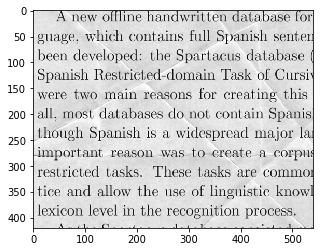

In [14]:
plt.imshow(test_images[50], cmap='gray')

# Normalizing Test Data

In [15]:
(test_small_images,ignore,test_big_images,ignore2)=Data_split(test_images,test_images)
#2 values ignored because we have no test labels

In [16]:
test_small_images[1]

array([[[0.88235295],
        [0.90588236],
        [0.9137255 ],
        ...,
        [0.88235295],
        [0.8862745 ],
        [0.8862745 ]],

       [[0.9098039 ],
        [0.9098039 ],
        [0.90588236],
        ...,
        [0.8901961 ],
        [0.89411765],
        [0.90588236]],

       [[0.9137255 ],
        [0.9019608 ],
        [0.8901961 ],
        ...,
        [0.89411765],
        [0.8980392 ],
        [0.87058824]],

       ...,

       [[0.8980392 ],
        [0.9019608 ],
        [0.8862745 ],
        ...,
        [0.59607846],
        [0.6313726 ],
        [0.5686275 ]],

       [[0.9098039 ],
        [0.92156863],
        [0.90588236],
        ...,
        [0.6039216 ],
        [0.5686275 ],
        [0.47058824]],

       [[0.8745098 ],
        [0.8901961 ],
        [0.9019608 ],
        ...,
        [0.6039216 ],
        [0.5764706 ],
        [0.5647059 ]]], dtype=float32)

# Import Trained Network

In [17]:
network=keras.models.load_model('trained_network_v2_multi_size.h5')

In [18]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, 540, 32)     320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, 270, 32)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, 270, 32)     9248      
__________

# Run Test

In [20]:
test_big_result=network.predict(test_big_images)

In [21]:
test_small_result=network.predict(test_small_images)

In [22]:
test_big_result[1]

array([[[0.87611943],
        [0.98960894],
        [0.9973436 ],
        ...,
        [0.9790467 ],
        [0.96791416],
        [0.8904615 ]],

       [[0.9734535 ],
        [0.999663  ],
        [0.9998683 ],
        ...,
        [0.9896304 ],
        [0.98521256],
        [0.8927097 ]],

       [[0.9930132 ],
        [0.9999039 ],
        [0.9999547 ],
        ...,
        [0.9844125 ],
        [0.98498005],
        [0.8877097 ]],

       ...,

       [[0.99714905],
        [0.9997253 ],
        [0.99993   ],
        ...,
        [0.9999242 ],
        [0.9998209 ],
        [0.9940544 ]],

       [[0.9912503 ],
        [0.99834514],
        [0.999602  ],
        ...,
        [0.99947315],
        [0.99771404],
        [0.9665109 ]],

       [[0.92654204],
        [0.963764  ],
        [0.98316634],
        ...,
        [0.97076213],
        [0.9400711 ],
        [0.7781516 ]]], dtype=float32)

In [23]:
example=test_small_result[1]
example=example*255
example=example.astype('uint8')
example=example.reshape(258,540)

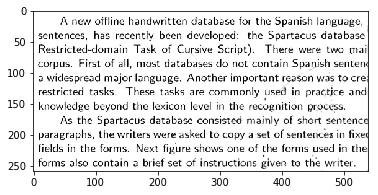

In [24]:
plt.imshow(example, cmap='gray')

In [25]:
pre_example=test_small_images[1]
pre_example=pre_example*255
pre_example=pre_example.astype('uint8')
pre_example=pre_example.reshape(258,540)

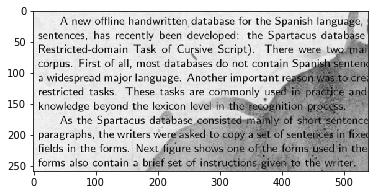

In [26]:
plt.imshow(pre_example, cmap='gray')

# convert Test result to the csv format accepted by Kaggle

Form the submission file by melting each images into a set of pixels, assigning each pixel an id of image_row_col (e.g. 1_2_1 is image 1, row 2, column 1). Intensity values range from 0 (black) to 1 (white). The file should contain a header and have the following format:

id,value
1_1_1,1
1_2_1,1
1_3_1,1
etc.